In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet


In [2]:
data_raw = pd.read_csv('raw_data/sales_train.csv', parse_dates=['date'])

/var/folders/jd/69j4d5lx4s9dg3b1d0bfcxx80000gp/T/ipykernel_3887/955914040.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_raw = pd.read_csv('raw_data/sales_train.csv', parse_dates=['date'])


In [3]:
data_raw = data_raw.sort_values('date', ascending=True)

In [4]:
data_raw.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
109593,2013-01-01,0,46,18616,349.0,1.0
85162,2013-01-01,0,54,11854,199.0,1.0
18128,2013-01-01,0,28,4906,1799.0,1.0
112216,2013-01-01,0,42,2931,99.0,1.0
85141,2013-01-01,0,54,11604,349.0,1.0


In [5]:
data_raw['id_final'] = data_raw.apply(lambda x: (f"{x['shop_id']}-{x['item_id']}"), axis=1)

In [64]:
df = data_raw[['date','id_final','item_cnt_day', 'date_block_num']]

In [65]:
df = df.rename(columns={'date': 'ds', 'item_cnt_day':'y'})

In [66]:
df.head()

,ds,id_final,y,date_block_num
109593,2013-01-01,46-18616,1.0,0
85162,2013-01-01,54-11854,1.0,0
18128,2013-01-01,28-4906,1.0,0
112216,2013-01-01,42-2931,1.0,0
85141,2013-01-01,54-11604,1.0,0


Running Prophet test

In [9]:
key_groups = df.groupby('id_final')

In [10]:
id_list = key_groups.groups.keys()

In [60]:
id_list_2 = df.head(1000).id_final.tolist()

In [61]:
len(id_list_2)

1000

In [62]:
#making predictions 
def train_and_forecast(group):
        
    #defining model
    model = Prophet()

    #fitting model 
    model.fit(group)

    #making predictions
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)[['ds','yhat']]
    forecast['id_final'] = group['id_final'].iloc(0)

    #results
    return forecast[['ds','id_final','yhat']]


In [63]:
#loop forecast
for_loop_forecast = pd.DataFrame()

#looping 
for id_final in id_list_2:

    group = key_groups.get_group(id_final)
    if len(group)>2:
        
        forecast = train_and_forecast(group)
        for_loop_forecast = pd.concat((for_loop_forecast,forecast))
    


16:22:34 - cmdstanpy - INFO - Chain [1] start processing
16:22:34 - cmdstanpy - INFO - Chain [1] done processing
16:22:35 - cmdstanpy - INFO - Chain [1] start processing
16:22:35 - cmdstanpy - INFO - Chain [1] done processing
16:22:36 - cmdstanpy - INFO - Chain [1] start processing
16:22:36 - cmdstanpy - INFO - Chain [1] done processing
16:22:40 - cmdstanpy - INFO - Chain [1] start processing
16:22:40 - cmdstanpy - INFO - Chain [1] done processing
16:22:41 - cmdstanpy - INFO - Chain [1] start processing
16:22:41 - cmdstanpy - INFO - Chain [1] done processing
16:22:41 - cmdstanpy - INFO - Chain [1] start processing
16:22:41 - cmdstanpy - INFO - Chain [1] done processing
16:22:42 - cmdstanpy - INFO - Chain [1] start processing
16:22:43 - cmdstanpy - INFO - Chain [1] done processing
16:22:44 - cmdstanpy - INFO - Chain [1] start processing
16:22:44 - cmdstanpy - INFO - Chain [1] done processing
16:22:44 - cmdstanpy - INFO - Chain [1] start processing
16:22:45 - cmdstanpy - INFO - Chain [1]

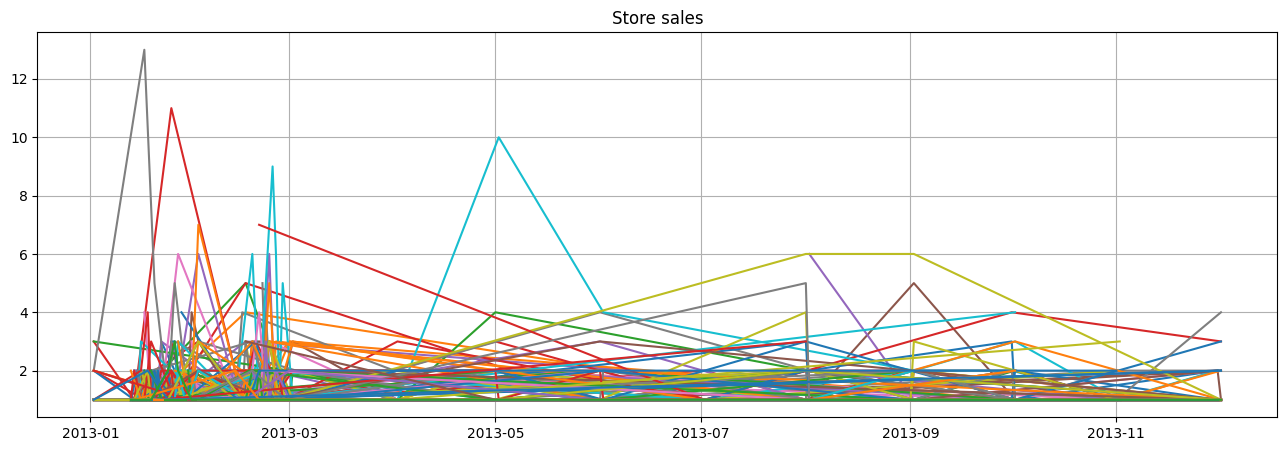

In [5]:
plt.subplots(1, figsize=(16,5))
plt.grid()
plt.title('Store sales')
for item in set(data_raw[data_raw['shop_id'] == 1]['item_id']):
         plt.plot(data_raw[(data_raw['shop_id'] == 1) &
                  (data_raw['item_id'] == item)]['item_cnt_day'])

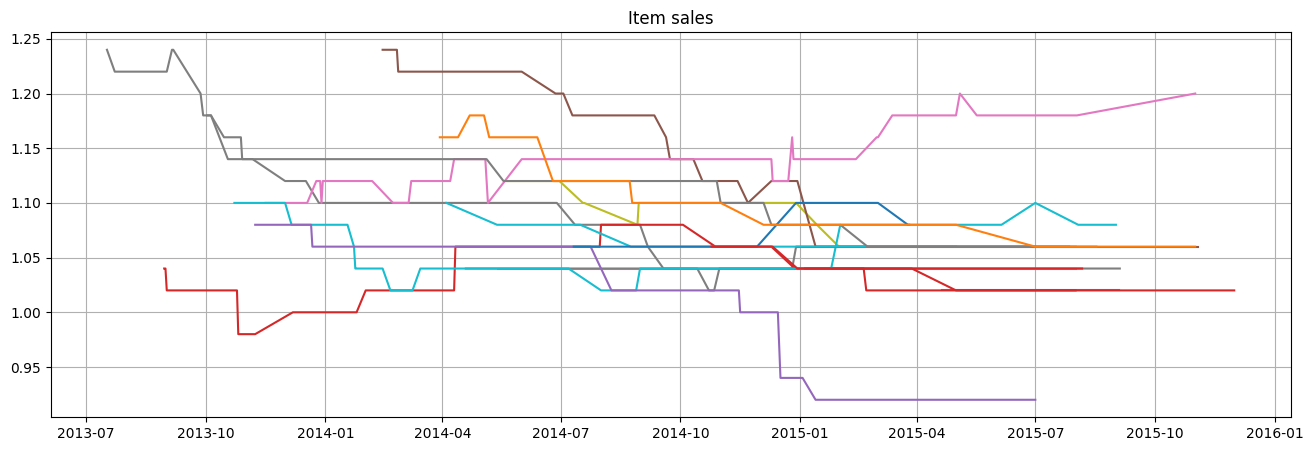

In [6]:
plt.subplots(1, figsize=(16,5))
plt.grid()
plt.title('Item sales')
for store in set(data_raw[data_raw['item_id'] == 4906]['shop_id']):
         plt.plot(data_raw[(data_raw['item_id'] == 4906) &
                  (data_raw['shop_id'] == store)]['item_cnt_day'].rolling(window=50).mean())

In [7]:
prophet_basic = Prophet()

TypeError: 'module' object is not callable

In [7]:
train_dataset = data_raw[(data_raw['item_id'] == 1) & data_raw['shop_id'] == 1]
train_dataset.reset_index(level=0, inplace=True)
train_dataset = train_dataset[['date','item_cnt_day']]
train_dataset.columns = ['ds','y']

prophet_basic = Prophet()
prophet_basic.fit(train_dataset)

TypeError: 'module' object is not callable